# 10 Year Real Interest Rate Regression 

In this notebook we'll develop a Multiple Linear Regression Model to predict **10 Year Real Interest Rates** having *Consumer Price Index (CPI)*, *Gross Domestic Product (GDP)* and *Employed full time Median usual weekly real earnings* as predictors. The model will be trained on data from 1990 up to 2022.

## Data

For the task, we'll use datasets from the **Federal Reserve Economic Data (FRED)** (https://fred.stlouisfed.org/)

### Libraries

We'll start by importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### 10 Year Real Interest Rates

According to the Federal Reserve Bank of Cleveland, *The 10-year expected inflation estimate [...] is the rate that inflation is expected to average over the next 10 years.* (https://www.clevelandfed.org/indicators-and-data/inflation-expectations#background)

In [250]:
INTEREST_URL = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1139&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=REAINTRATREARAT10Y&scale=left&cosd=1982-01-01&coed=2024-03-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-04-05&revision_date=2024-04-05&nd=1982-01-01'
interest_df = pd.read_csv(INTEREST_URL)

In [224]:
interest_df.head()

,DATE,REAINTRATREARAT10Y
0,1982-01-01,7.623742
1,1982-02-01,7.656648
2,1982-03-01,7.128993
3,1982-04-01,7.408347
4,1982-05-01,7.320041


In [225]:
interest_df.shape

(507, 2)

In [226]:
interest_df.describe()

,REAINTRATREARAT10Y
count,507.000000
mean,2.440231
std,1.852797
min,-0.407134
25%,0.868883
50%,2.199885
75%,3.626434
max,7.656648


### Consumer Price Index

According to the U.S Bureau of Labos Statistics *The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services.* (https://www.bls.gov/cpi/)

In [215]:
CPI_URL = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CPIAUCSL&scale=left&cosd=1947-01-01&coed=2024-02-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-04-05&revision_date=2024-04-05&nd=1947-01-01'
cpi_df = pd.read_csv(CPI_URL)

In [216]:
cpi_df.head()

,DATE,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [217]:
cpi_df.shape

(926, 2)

In [219]:
cpi_df.describe()

,CPIAUCSL
count,926.000000
mean,119.437087
std,85.211463
min,21.480000
25%,32.297500
50%,107.800000
75%,191.400000
max,311.054000


### GDP

According to the Federal Reserve Economic Data (FRED) the *Gross domestic product (GDP), the featured measure of U.S. output, is the market value of the goods and services produced by labor and property located in the United States.* (https://fred.stlouisfed.org/series/GDP)

In [227]:
GDP_URL = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1139&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GDP&scale=left&cosd=1947-01-01&coed=2023-10-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-04-05&revision_date=2024-04-05&nd=1947-01-01'
gdp_df = pd.read_csv(GDP_URL)

In [231]:
gdp_df.head()

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [232]:
gdp_df.dtypes

DATE     object
GDP     float64
dtype: object

In [234]:
gdp_df.describe()

,GDP
count,308.000000
mean,7159.388886
std,7393.115602
min,243.164000
25%,802.669250
50%,4340.830000
75%,12360.783750
max,27956.998000


### Employed full time: Median usual weekly real earnings

*Data measure usual weekly earnings of wage and salary workers. Wage and salary workers are workers who receive wages, salaries, commissions, tips, payment in kind, or piece rates. The group includes employees in both the private and public sectors but, for the purposes of the earnings series, it excludes all self-employed persons, both those with incorporated businesses and those with unincorporated businesses.* (https://fred.stlouisfed.org/series/LES1252881600Q)

In [233]:
WAGE_URL = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1139&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=LES1252881600Q&scale=left&cosd=1979-01-01&coed=2023-10-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-04-05&revision_date=2024-04-05&nd=1979-01-01'
wage_df = pd.read_csv(WAGE_URL)

In [235]:
wage_df.head()

,DATE,LES1252881600Q
0,1979-01-01,335
1,1979-04-01,335
2,1979-07-01,330
3,1979-10-01,326
4,1980-01-01,321


In [236]:
wage_df.dtypes

DATE              object
LES1252881600Q     int64
dtype: object

In [237]:
wage_df.describe()

,LES1252881600Q
count,180.000000
mean,332.488889
std,16.909714
min,309.000000
25%,317.000000
50%,333.000000
75%,340.000000
max,393.000000


## Data Cleaning

From the raw data set, we observe a few issues for the analysis:
- We have four different datasets initially with no index for joins
- Dates are of type *object*
- Dates from each dataset ranges from values that are different form the period of interest (1990-2022)

We'll address those issues by creating a function that will standardize the dataframes and create the columns year and month, that will later be used as composite keys in the merge strategy. The method will also drop the date columns, that are not going to be relevant for the analysis.

In [248]:
def standardize_dates(df: pd.DataFrame, date_col: str) -> pd.DataFrame:
    '''
    Function that receives a pd.DataFrame obj and returns a Data Frame w/ standard 
    Year and Month cols for the period of interest (1990 - 2022)
    '''
    df[date_col] = pd.to_datetime(df[date_col])
    df['Month'] = df[date_col].dt.month
    df['Year'] = df[date_col].dt.year
    df = df.drop(date_col, axis=1, errors='ignore')
    df = df[(df['Year'] > 1989) & (df['Year'] < 2023)]
    return df

In [251]:
interest_df = standardize_dates(interest_df, 'DATE')
interest_df.head()

,REAINTRATREARAT10Y,Month,Year
96,4.127623,1,1990
97,4.366927,2,1990
98,4.551968,3,1990
99,4.552162,4,1990
100,4.805062,5,1990


In [239]:
cpi_df = standardize_dates(cpi_df, 'DATE')
cpi_df.head()

,CPIAUCSL,Month,Year
516,127.5,1,1990
517,128.0,2,1990
518,128.6,3,1990
519,128.9,4,1990
520,129.1,5,1990


In [240]:
gdp_df = standardize_dates(gdp_df, 'DATE')
gdp_df.head()

,GDP,Month,Year
172,5872.701,1,1990
173,5960.028,4,1990
174,6015.116,7,1990
175,6004.733,10,1990
176,6035.178,1,1991


In [241]:
wage_df = standardize_dates(wage_df, 'DATE')
wage_df.head()

,LES1252881600Q,Month,Year
44,319,1,1990
45,319,4,1990
46,313,7,1990
47,312,10,1990
48,316,1,1991


### Variables trend over time Visualizations

We'll now plot how the variables of interest evolve over time. We'll be defining a function that aggregates values by year. We'll choose median values, once those are more robust to outliers than averages.

In [342]:
def display_year_trend_plot(df: pd.DataFrame, col: str, years: range):
    '''
    This method receives a dataframe, a column and a range of years and return an lineplot
    that displays the evolution trend over the period of interest.
    '''
    plot = sns.lineplot(
        x = years,
        y=df.groupby(['Year'])[col].mean(),
        data=df
    )
    plot.set(title=f'{col} {years[0]}-{years[-1]}')
    plot.set_xticks(years)
    
    for ind, label in enumerate(plot.get_xticklabels()):
        if ind % 2 == 0:  # every 2nd label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    return plot

### Expected 10 Year Real Interest Rate

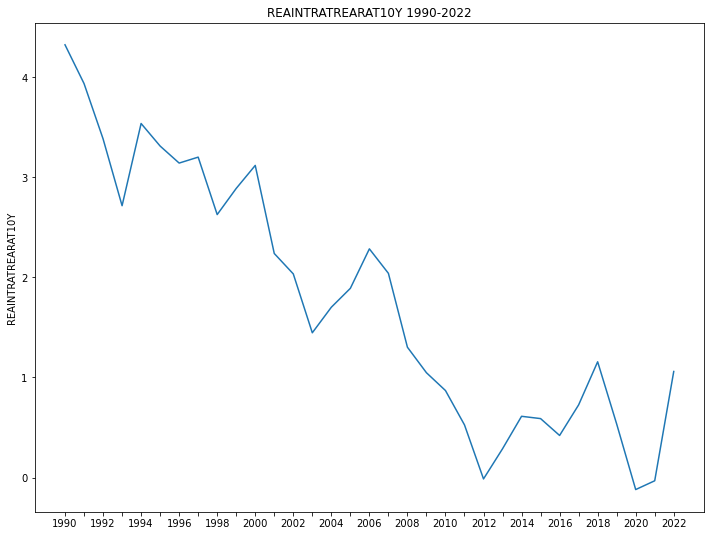

In [267]:
interest_plot = display_year_trend_plot(interest_df, 'REAINTRATREARAT10Y', range(1990, 2023))
interest_plot

#### Consumer Price Index

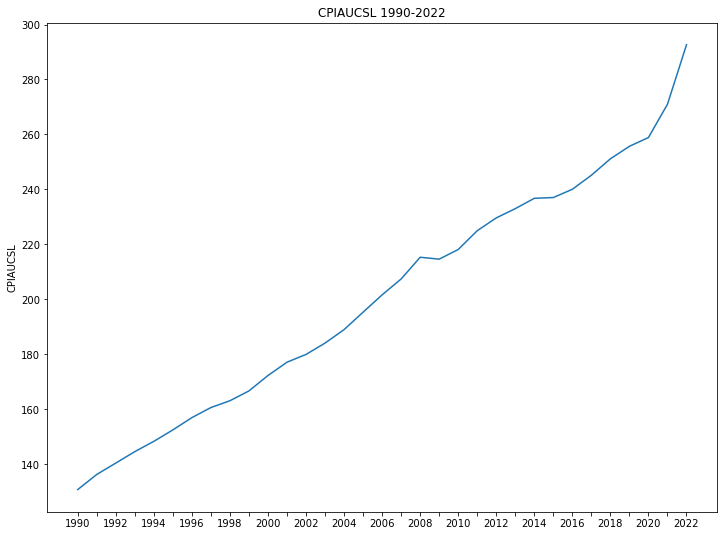

In [268]:
cpi_plot = display_year_trend_plot(cpi_df, 'CPIAUCSL', range(1990, 2023))
cpi_plot

### GDP

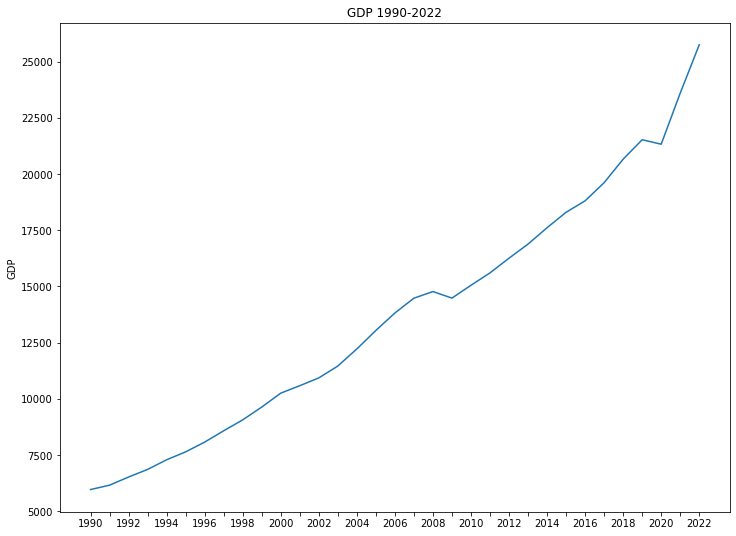

In [269]:
gdp_plot = display_year_trend_plot(gdp_df, 'GDP', range(1990, 2023))
gdp_plot

### Employed Median usual weekly wage

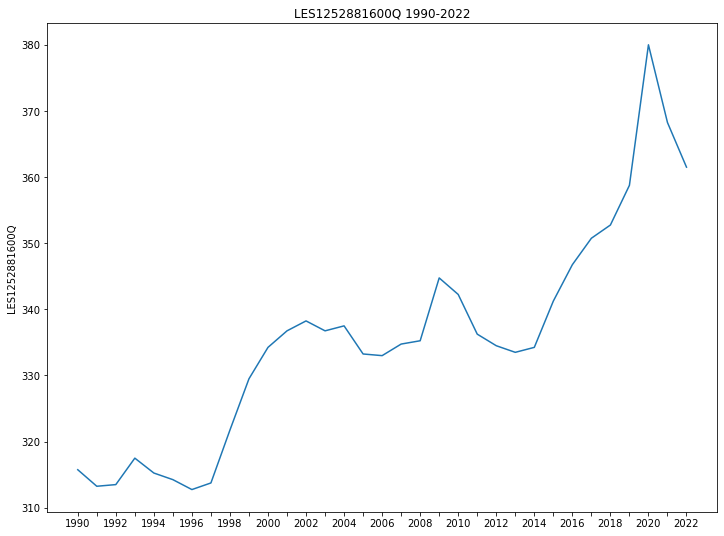

In [270]:
wage_plot = display_year_trend_plot(wage_df, 'LES1252881600Q', range(1990, 2023))
wage_plot

### Merging datasets into df_final

In [297]:
df_w_cpi = gdp_df.merge(cpi_df, on=['Year', 'Month'], how='left')

In [298]:
df_w_interest = df_w_cpi.merge(interest_df, on=['Year', 'Month'], how='left')

In [299]:
df_final = df_w_interest.merge(wage_df, on=['Year', 'Month'], how='left')

In [300]:
# Drop Year and Month columns and display merged dataset
df_final = df_final.drop(['Month', 'Year'], axis=1, errors='ignore')
df_final.head()

,GDP,CPIAUCSL,REAINTRATREARAT10Y,LES1252881600Q
0,5872.701,127.5,4.127623,319
1,5960.028,128.9,4.552162,319
2,6015.116,130.5,4.341818,313
3,6004.733,133.4,4.200539,312
4,6035.178,134.7,3.922931,316


## Exploratory Data Analysis

Lets start by visualizing the pairplot for each feature

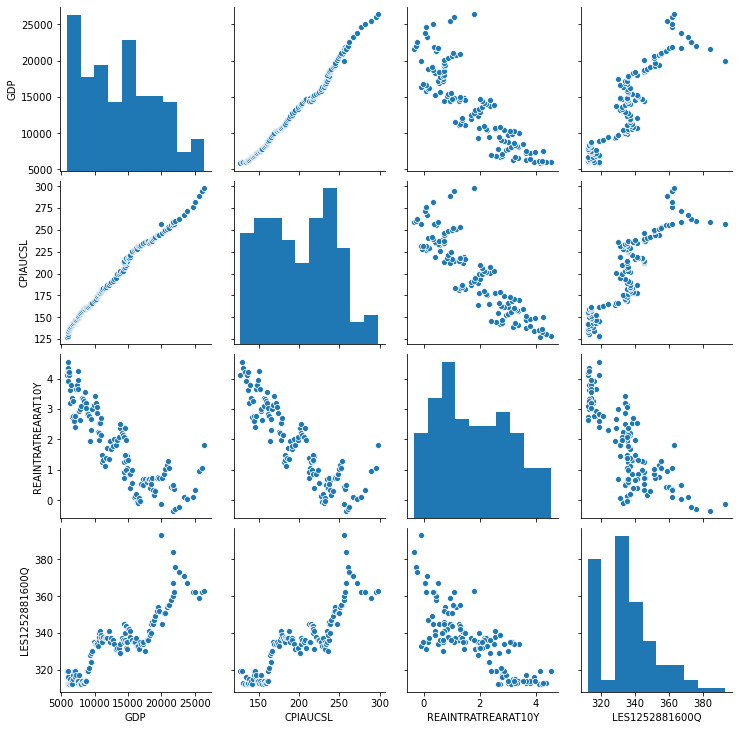

In [301]:
sns.pairplot(df_final)

From the pairplot, we have good and potentialy bad news:

- The predictors seem to be roughly linearly related to the response
- Predictors seem to be correlated!

### Correlation Matrix

Let's Explore the Correlation Matrix to further investigate the issue:

In [302]:
df_final.corr()

,GDP,CPIAUCSL,REAINTRATREARAT10Y,LES1252881600Q
GDP,1.000000,0.993684,-0.855228,0.885095
CPIAUCSL,0.993684,1.000000,-0.885342,0.870326
REAINTRATREARAT10Y,-0.855228,-0.885342,1.000000,-0.782689
LES1252881600Q,0.885095,0.870326,-0.782689,1.000000


From the Correlation Matrix we observe that, indeed, the predictors are correlated. And what about Multicolinearity in the Design Matrix?

#### Model Purpose!

**From the Book *Applied Linear Statistical Models*, Kutner et al., p. 283 we have:**

*The fact that some or all predictor variables are correlated among themselves does not, in general, inhibit our ability to obtain a good fit nor does it tend to affect inferences about mean responses or predicions of new observations, provided these inferences are made within the region of observations.*


**It's also important to note that:** 

*The common interpretation of a regression coefficient as measuring the change in the expected value of the response variable [...] while all other predictor variables are held constant is not fully applicable [...] For example, in a regression model for predicting crop yield from amount of rainfall and hours of sunshine, the relation between the two predictor variables makes it unrealistic to consider varying one while holding the other constant.*

#### Takeaway:

- Once our goal is prediction, if we don't extrapolate a new prediciton set qualitatively or quantitatively (in regard of the training set), this should not impact the model's predictive power and/or it's fit

Let's test this idea with Statistical Analysis!

## Statistical Analysis

We'll use the *the statsmodels api* to get an initial statistical report from the linear model, having the 10-Y Expected Inflation as the response variable and the others as predictors.

In [321]:
import statsmodels.formula.api as smf

In [344]:
model = smf.ols(formula='REAINTRATREARAT10Y ~ CPIAUCSL + GDP + LES1252881600Q', data=df_final).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     REAINTRATREARAT10Y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     231.3
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           1.70e-51
Time:                        12:26:32   Log-Likelihood:                -97.366
No. Observations:                 132   AIC:                             202.7
Df Residuals:                     128   BIC:                             214.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         18.4782      2.087      8.

From the model summary we observe a few things:

    - The model F-test is statistically significant, meaning that the fitted model with the parameters performs better than just the model with the intercept (Null Hypothesis)
    
    - All predictors are statistically significant
    
    - GDP's coefficient is low, but removing the predictor significantly reduces the R2, so we'll decide to keep the feature
    
    - The model R2 is 0.844 and Adjusted R2 is 0.841, meaning that the model does a good job explaining the response variability
    
    - As previously discussed, the condition number of the Design Matrix is high, which is not a problem for models built with predictive purposes

### Train Test Split

The data will be splitted into a Train set, with 80% of the rows and 20% for validation

In [304]:
from sklearn.model_selection import train_test_split

In [305]:
X = df_final[['CPIAUCSL', 'GDP', 'LES1252881600Q']]
Y = df_final['REAINTRATREARAT10Y']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Model Fit

In [317]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#### Coefficients

In [309]:
lr.coef_

array([[-3.10158737,  2.47025751, -0.26546734]])

### R2

We'll import the **r2_score** function from *sklearn.metrics*, predict on the test set and compare to the actual responses to obtain the effective R2 score from the fitted model

In [323]:
from sklearn.metrics import r2_score

In [331]:
predictions = lr.predict(X_train)
r2_score(predictions, y_train)

0.8055604380979458

In [333]:
pred_df = pd.DataFrame({'Predicitons': predictions, 'Response': y_train})

## Response vs Prediction Plot

[Text(0.5, 1.0, 'Response vs Prediction')]

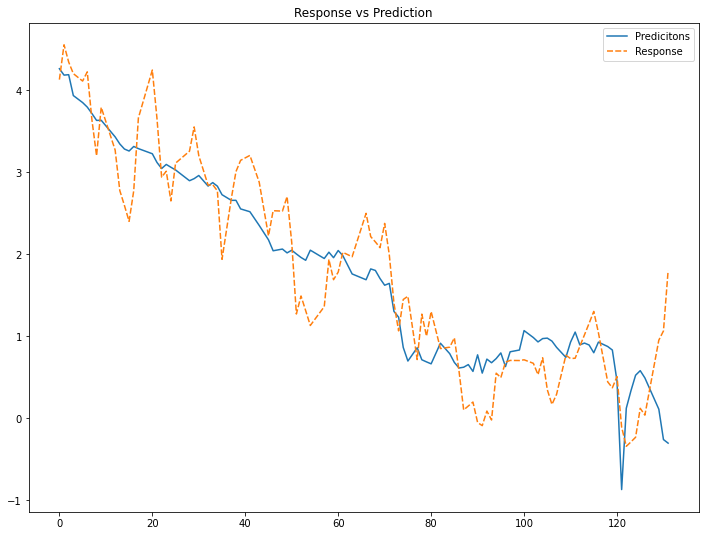

In [336]:
plot = sns.lineplot(data=pred_df)
plot.set(title='Response vs Prediction')

### Train Score

In [319]:
lr.score(X_train, y_train)

0.8372127246083376

### Test Score

In [318]:
lr.score(X_test, y_test)

0.8630491184794564

## Conclusion

- The Consumer Price Index is negatively Correlated with the Expected 10 Year Interest Rate 

- The Employee Median Weekly Salary is negatively Correlated with the Expected 10 Year Interest Rate 

- The GDP  is positvely Correlated with the Expected 10 Year Interest Rate 

- Precise quantitative analysis from each predictor (how a 1 unit/standard deviation change impacts the reponse) is not reliable due to Multicolinearity, but this does not impact the model predictive power

### References and interesting reads:

 - Why multicollinearity isn’t an issue in Machine Learning: https://towardsdatascience.com/why-multicollinearity-isnt-an-issue-in-machine-learning-5c9aa2f1a83a
 
 - Multicollinearity in Regression Analysis - Problems, Detection, and Solutions: https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/
 
 - Federal Reserve Economic Data: https://fred.stlouisfed.org/
 
 - Federal Reserve Bank of Cleveland: https://www.clevelandfed.org/
 
 - U.S Bureau of Labos Statistics: https://www.bls.gov/cpi/
 
 - Applied Linear Statistical Models Book (Kutner et al.): https://www.amazon.com/dp/0071122214